<a href="https://colab.research.google.com/github/leejeongeun97/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_04_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91_%EC%A0%95%EC%A0%81%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 4. 웹 크롤링으로 데이터 수집 - 정적 웹크롤링

### #그래프에서 한글사용하는 방법
- **(코랩에서)한글폰트 설치하기**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (15.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

- **한글 폰트 지정하기**

In [4]:
# 코랩에서 한글 폰트 종류와 이름이 win과 다를 수 있다!!!
# 코랩: NanumGothic, 윈도우: Malgun Gothic
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'NanumBarunGothic',
                     'font.size': 12,
                     'figure.figsize': (6, 4),
                     'axes.unicode_minus':  False }) # 폰트 설정



### 1) 웹 크롤링 기초

### 라이브러리 설치하기

In [5]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

In [6]:
# HTML과 XML 문서를 파싱하기 위한 파이썬 패키지
!pip install beautifulsoup4

In [7]:
# 동적 크롤링을 위한 셀레니움 설치
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00


In [8]:
# 동적 크롤링을 위한 크롬드라이버 자동설치 라이브러리 설치
!pip install chromedriver-autoinstaller

In [9]:
import requests
import bs4
import selenium
print(requests.__version__)
print(bs4.__version__)
print(selenium.__version__)

2.31.0
4.12.3
4.19.0


### 2) 정적 크롤링(스크래핑)

#### 1.웹 페이지 가져오기

In [10]:
import requests

requests.get("https://www.naver.com")

<Response [200]>

In [17]:
import requests

response = requests.get("https://google.com")

# 응답 상태
print('#응답 상태: ', response.status_code)

# 응답 바이너리 원문
print('#응답 바이너리 원문: ', response.content)

# # 응답 UTF-8로 인코딩된 문자열
print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# # 응답 헤더
print('#응답 헤더: ',response.headers )

# # 응답 헤더: 콘텐트 유형
print('#응답 헤더유형: ',response.headers['Content-Type'] )

#응답 상태:  200
#응답 바이너리 원문:  b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="ybVs0TcUO0JA_TMC-4v4aQ">(function(){var _g={kEI:\'G3AoZsWeIZatxc8P0eOG4AU\',kEXPI:\'0,1370478,2329784,687,361,448603,29615,4998,58391,2891,3926,4422,3406,76620,2025,1,16916,31347,33906,24010,6684,7596,1,42154,2,16395,342,23024,6699,41943,24676,33064,2,2,1,6959,19673,8155,23350,22436,9779,42459,20198,36747,3801,2412,30219,2266,764,15816,1804,7734,18098,575,20675,1633,9710,3784,29968,549,931,11419,5203210,5932,285,1010,1348,5993321,2839368,1,2,1,2,1,

#### 2.웹 페이지에서 정보 추출하기
- BeautifulSoup 라이브러리 사용하여 웹페이지에서 정보 추출하기
- 네이버 메인(https://www.naver.com/) > 검색어 입력(**눈물의여왕**) > 검색된 결과 페이지에서 **제목**만 추출

#### [예제] : Text 제목 정보 1개 가져오기 in (정적인 페이지)

* 뉴스 제목이 있는 위치 찾는 방법
    1. 크롬브라우저를 연다.
    2. Target URL =https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95 페이지를 연결한다.
    3. 키보드에서 F12 키를 눌러 크롬 개발자 도구를 연다
    4. 개발자 도구에서 마우스로 영역선택( )메뉴를 클릭하고 마우스를 뉴스 제목 부분에 놓고 클릭한다.
    5.마우스 오른쪽 버튼을 클릭하고 메뉴(Copy > copy selector)를 선택한다.
    6. 5에서 복사된 뉴스 제목이 있는 영역으 tag를 코드에 붙여넣는다.


In [22]:
import requests
from bs4 import BeautifulSoup

url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95'
print(url)

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    print(f"soup:{soup}")
    title = soup.select_one('#sp_nws1 > div.news_wrap.api_ani_send > div > div.news_contents > a.news_tit')
    print(f"타이틀: {title}")
    print(f"제목: {title.attrs['title']}")  # 제목 추출 : title.get_text()
else :
    print(response.status_code)
print('----------')

https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95
soup:<!DOCTYPE html>
 <html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="눈물의여왕 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'눈물의여왕'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'눈물의여왕'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>눈물의여왕 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic

#### [예제] Text 정보 여러 개 가져오기 in (정적인 페이지)

In [23]:
import requests
from bs4 import BeautifulSoup

print('페이지 정보 추출하기-----')
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95'
print(url)

response = requests.get(url)

t_list, d_list, link_list = [], [], []
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ul = soup.select_one('ul.list_news') #공백에 있을 경우 . 사용
    # 제목, 링크
    titles = ul.select('li > div > div > div.news_contents > a.news_tit')
    for title in titles:
        t_list.append(title.attrs['title'])
        link_list.append(title.attrs['href'])
#         print(title.get_text())
    # 상세 설명
    titles = ul.select('li > div > div > div.news_contents > div.news_dsc > div.dsc_wrap > a')
    for title in titles:
        d_list.append(title.get_text())
else :
    print(response.status_code)
print('페이지 정보 추출완료-----')
t_list, d_list, link_list

페이지 정보 추출하기-----
https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%88%88%EB%AC%BC%EC%9D%98%EC%97%AC%EC%99%95
페이지 정보 추출완료-----


(["몰래 훔쳐보고 평점 7.7점…中 '눈물의 여왕' 도둑시청 논란",
  '\'눈물의 여왕\' 또 불법시청..서경덕 "이젠 中당국이 나서야"',
  '‘눈물의 여왕’ 크러쉬 OST, 음원차트 톱10',
  '中, \'눈물의 여왕\'도 훔쳐본다… "부끄러움 못 느껴"',
  "김수현·김지원 '눈물의 여왕', 또 한 번의 종방연 27일 연다…장소 조율 중",
  "커피머신 한대에 600만원…'눈물의 여왕' 속 가전 정체는?",
  '정려원♥위하준 벌써 케미 난리…‘눈물의 여왕’ 후속작 맞네 (졸업)',
  '‘눈물의 여왕’ 김수현, 시계도 남달라',
  '‘눈물의 여왕’ 백현우와 실제 재벌가 사위는 다르다?',
  '종영 앞둔 ‘눈물의 여왕’, 편성 시간 변경'],
 ['tvN 드라마 \'눈물의 여왕\'이 인기를 끌고 있는 가운데 중국에서 또 \'도둑 시청\'을 해 논란이 일고 있다. 23일 서경덕 성신여대 교수는 자신의 페이스북을 통해 "최근 국내를 넘어 넷플릭스를 통해 세계적인 인기를 끌고 있는 드라마 \'눈물의 여왕\' 훔쳐보기가 중국에서 또 기승을 부리고 있다"고 지적했다. 그는...',
  '최근 국내를 넘어 세계적 인기를 끌고 있는 드라마 \'눈물의 여왕\'이 중국에서 또 \'훔쳐보기\'로 몸살을 앓고 있다. 23일 서경덕 성신여대 교수에 따르면 중국 콘텐츠 리뷰 사이트 \'더우반\'에는 \'눈물의 여왕\' 리뷰 화면이 만들어졌으며, 현재 4만6000여 건의 리뷰가 버젓이 남겨져 있다. 서 교수는 이에 대해 "영화...',
  '‘눈물의 여왕’ OST ‘미안해 미워해 사랑해’가 드라마 화제성과 더불어 파죽지세 인기를 보여주고 있다. 최고 시청률 26%를 돌파한 ‘눈물의 여왕’ OST Part.4 ‘미안해 미워해 사랑해’가 국내 주요 온라인 음원사이트 멜론을 비롯해 지니뮤직, 벅스, 플로 실시간 차트 TOP 10 진입에 성공했다....',
  '최근 인기리 방영되고 있는 국내 드라마 \'눈물의 여왕\'이 중국에서 불법 유통되고 있는 것으로 나타났다. 서

In [24]:
# pandas DataFrame으로 나타내기
import pandas as pd

data = {'title': t_list, 'desc':d_list,'link':link_list}
df = pd.DataFrame(data)

df.to_csv('my_naver_news.csv', index=False) # 파일로 저장하기

df.head()

,title,desc,link
0,몰래 훔쳐보고 평점 7.7점…中 '눈물의 여왕' 도둑시청 논란,tvN 드라마 '눈물의 여왕'이 인기를 끌고 있는 가운데 중국에서 또 '도둑 시청'...,https://view.asiae.co.kr/article/2024042310394...
1,"'눈물의 여왕' 또 불법시청..서경덕 ""이젠 中당국이 나서야""",최근 국내를 넘어 세계적 인기를 끌고 있는 드라마 '눈물의 여왕'이 중국에서 또 '...,https://www.newsis.com/view/?id=NISX20240423_0...
2,"‘눈물의 여왕’ 크러쉬 OST, 음원차트 톱10",‘눈물의 여왕’ OST ‘미안해 미워해 사랑해’가 드라마 화제성과 더불어 파죽지세 ...,https://sports.khan.co.kr/news/sk_index.html?a...
3,"中, '눈물의 여왕'도 훔쳐본다… ""부끄러움 못 느껴""",최근 인기리 방영되고 있는 국내 드라마 '눈물의 여왕'이 중국에서 불법 유통되고 있...,https://www.daejonilbo.com/news/articleView.ht...
4,"김수현·김지원 '눈물의 여왕', 또 한 번의 종방연 27일 연다…장소 조율 중",'눈물의 여왕'이 또 한 번의 종방연을 오는 27일 연다. tvN 토·일 드라마 '...,https://www.news1.kr/articles/5393876


#### **[실습] : 할리스 커피매장 정보 수집하기**
 - 매장정보 : https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=


In [25]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

MAX = 100    # 총 가져올 건수
FILE = 'hollys_매장정보.csv'

#[CODE 1]
def hollys_store(result):
    cnt, MAX_flag = 0, False
    for page in range(1,59):
#         Hollys_url = f'https://www.hollys.co.kr/store/korea/korStore.do?pageNo={page}&sido=&gugun=&store='
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
            cnt += 1
            print(f'[{cnt:0>3}] {store_name}  \t {store_sido}')
            if cnt == MAX:
                MAX_flag = True
                break
        if MAX_flag:
            break

    return

#[CODE 0]
def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv(FILE, encoding='cp949', mode='w', index=True)
    del result[:]
    return hollys_tbl


df = main()
df

Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=
[001] 왕십리역점  	 서울 성동구
[002] 강릉안목해변점  	 강원 강릉시
[003] 군산수송점  	 전북 군산시
[004] 광주운암점  	 광주 북구
[005] 구리돌다리점  	 경기 구리시
[006] 소월아트홀점  	 서울 성동구
[007] 송파거여역점  	 서울 송파구
[008] 경주주상절리점  	 경북 경주시
[009] (하)홍성휴게소점  	 충남 홍성군
[010] (상)홍성휴게소점  	 충남 홍성군
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=
[011] 부산사상광장점  	 부산 사상구
[012] 인천항국제여객터미널점  	 인천 연수구
[013] 분당파크타운점  	 경기 성남시 분당구
[014] 하남덕풍점  	 경기 하남시
[015] 대전오류점  	 대전 중구
[016] 계룡대점  	 충남 계룡시
[017] 대전타임월드점  	 대전 서구
[018] 구미오태DT점  	 경북 구미시
[019] 화정DI점  	 경기 고양시 덕양구
[020] 부산광복점  	 부산 중구
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=3&sido=&gugun=&store=
[021] 과천정보타운점  	 경기 과천시
[022] 양평북한강DI점  	 경기 양평군
[023] 완주삼봉점  	 전북 완주군
[024] 잠실새내역점  	 서울 송파구
[025] 화성남양점  	 경기 화성시
[026] 중랑역점  	 서울 중랑구
[027] 분당서울대병원점  	 경기 성남시 분당구
[028] 강변역점  	 서울 광진구
[029] 대구중동점  	 대구 수성구
[030] 오산궐동점  	 경기 오산시
https://www

,store,sido-gu,address,phone
0,왕십리역점,서울 성동구,"서울특별시 성동구 왕십리광장로 17 (행당동, 왕십리민자역사) 비트플렉스몰 3층 영...",02-2200-1303
1,강릉안목해변점,강원 강릉시,"강원특별자치도 강릉시 창해로14번길 34-1 (견소동) 견소동283-6,견소동132",070-7575-0184
2,군산수송점,전북 군산시,"전라북도 군산시 수송북로 22 수송동 831-1,1층",063-467-9500
3,광주운암점,광주 북구,광주광역시 북구 북문대로 184 (운암동) .,062-531-7711
4,구리돌다리점,경기 구리시,경기도 구리시 경춘로227번길 14 (인창동) 1층,031-564-4565
...,...,...,...,...
95,전주한옥마을점,전북 전주시 완산구,전라북도 전주시 완산구 은행로 16 (풍남동 1가 53-3) .,063-288-0801
96,(상)홍천휴게소R점,강원 홍천군,강원도 홍천군 화촌면 서울양양고속도로 83 .,None
97,부산시민공원점,부산 부산진구,"부산 부산진구 시민공원로 73, 푸드코트피크닉 범전동 200",.
98,충남도청점,충남 홍성군,충청남도 홍성군 홍북읍 신경리 553 .,041-631-4725


#### **[실습] :  텍스트 데이터를 토큰화하여 빈도수를 구하고 빈도수에 따른 워드클라우드 만들기**
- 앞에서 수집한 할리스 커피매장의 매장 위치 정보 중 지역(**sido-gu**) 정보를 이용하여 워드 클라우드 만들기
- 필요한 라이브러리 및 주의사항
    - 사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출
    - 단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.

In [26]:
# 사이킷런 설치하기
!pip install scikit-learn

In [27]:
!pip install wordcloud

In [28]:
import sklearn
sklearn.__version__

'1.2.2'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


# 단어(토큰) 빈도수 막대 그래프 그리기
def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'./token_bar_graph.png')

# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩
   # font_path = 'malgun'  # C:/Windows/Fonts/                                  #window

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드.png')


# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['sido-gu'].to_list()
#print(corpus)

# 2.말뭉치를 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(corpus)

# 3.단어(토큰) 빈도수 막대 그래프 그리기(상위 10개)
#draw_wordTokenCountGraph(feature_name[:10], count[:10])

# 3.워드 클라우드 만들기
make_wordcloud(feature_name, count)

['서울 성동구',
 '강원 강릉시',
 '전북 군산시',
 '광주 북구',
 '경기 구리시',
 '서울 성동구',
 '서울 송파구',
 '경북 경주시',
 '충남 홍성군',
 '충남 홍성군',
 '부산 사상구',
 '인천 연수구',
 '경기 성남시 분당구',
 '경기 하남시',
 '대전 중구',
 '충남 계룡시',
 '대전 서구',
 '경북 구미시',
 '경기 고양시 덕양구',
 '부산 중구',
 '경기 과천시',
 '경기 양평군',
 '전북 완주군',
 '서울 송파구',
 '경기 화성시',
 '서울 중랑구',
 '경기 성남시 분당구',
 '서울 광진구',
 '대구 수성구',
 '경기 오산시',
 '서울 양천구',
 '경기 오산시',
 '인천 남동구',
 '서울 용산구',
 '서울 강서구',
 '부산 사상구',
 '강원 춘천시',
 '인천 연수구',
 '전남 순천시',
 '경남 진주시',
 '충남 논산시',
 '서울 구로구',
 '경기 고양시 일산동구',
 '경기 화성시',
 '전북 군산시',
 '서울 송파구',
 '경북 구미시',
 '경기 화성시',
 '서울 강서구',
 '서울 양천구',
 '인천 부평구',
 '서울 은평구',
 '울산 남구',
 '울산 중구',
 '경북 구미시',
 '서울 구로구',
 '제주 제주시',
 '서울 중구',
 '서울 송파구',
 '서울 강동구',
 '울산 북구',
 '서울 양천구',
 '서울 마포구',
 '울산 중구',
 '서울 노원구',
 '경기 남양주시',
 '경기 고양시 일산동구',
 '충북 청주시 청원구',
 '전북 전주시 덕진구',
 '서울 금천구',
 '경남 진주시',
 '강원 원주시',
 '강원 원주시',
 '충북 청주시 흥덕구',
 '충남 천안시 동남구',
 '충남 천안시 동남구',
 '충남 공주시',
 '경기 의정부시',
 '제주 제주시',
 '서울 마포구',
 '경기 고양시 덕양구',
 '서울 강남구',
 '경기 수원시',
 '경기 고양시 덕양구',
 '서울 용산구',
 '서울 양천구',
 '대구 서구',
 



---



### **[미션] : 네이버 뉴스 기사 제목을 워드클라우드로 만들기**
앞에서 정적크롤링으로 가져왔던 네이버 뉴스 기사 제목을 워드 클라우드로 만들어 보세요.

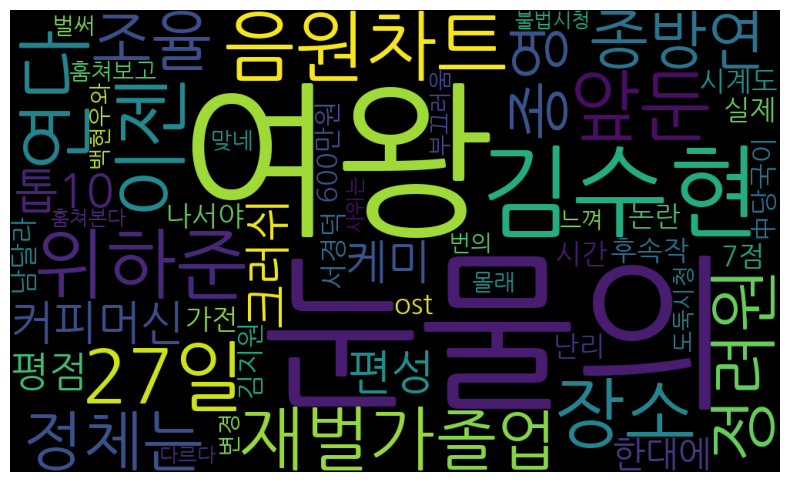

In [37]:
import pandas as pd

# 말뭉치를 토큰화하여 빈도수 가져오기
def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 말뭉치를 토큰화하기
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])
    return feature_name, count


# 워드클라우드 만들기
def make_wordcloud(feature_name, count):
    # 한글 폰트 경로를 설정
    font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  #코랩

    # (토큰명, 빈도수) 딕셔너리 타입으로 변환
    data = dict(zip(feature_name, count))

    # 워드클라우드로 그래프로 시각화
    wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
    plt.axis("off")
    plt.show()

    # 이미지 파일로 저장하기
    wc.to_file(f'./워드클라우드_눈물의여왕.png')

df = pd.read_csv('./my_naver_news.csv')
df


# 1.텍스트 말뭉치(corpus) 데이터 지정하기
corpus = df['title'].to_list()
corpus

# 2.말뭉치를 딕셔너리(토큰, 빈도수)로 만들기
feature_name, count = get_wordTokenCount(corpus)

# 3.딗셔너리 데이터로 워드 클라우드 만들기
# 4. 워드클라우드 이미지 파일로 저장하기

make_wordcloud(feature_name, count)







---



### **[미션] : 특정 웹 사이트 지정하여 정적크롤링 방법을 이용하여 TEXT 정보 추출하여 표로 만들기**
- 1. 자신이 원하는 웹 페이지를 정해서 100개 이상 텍스트 정보 추출하기
- 2. Pandas DataFrame 표로 나타내기
- 3. CSV file로 저장하기
  4. Slack에 코드 업로드하기

페이지 정보 추출하기-----
https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EC%8A%A4%ED%83%80%EB%B2%85%EC%8A%A4
<ul class="list_news _infinite_list" data-img-mutation=""> <li class="bx" id="sp_nws1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="http://news.mt.co.kr/mtview.php?no=2024042411082731344" href="#" onclick="tCR('a=nws*a.kep&amp;r=1&amp;i=880000C2_000000000000000005029769&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws*a.kepoff&amp;r=1&amp;i=880000C2_000000000000000005029769&amp;u=javascript" data-cr-on="a=nws*a.kepon&amp;r=1&amp;i=880000C2_000000000000000005029769&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="ht

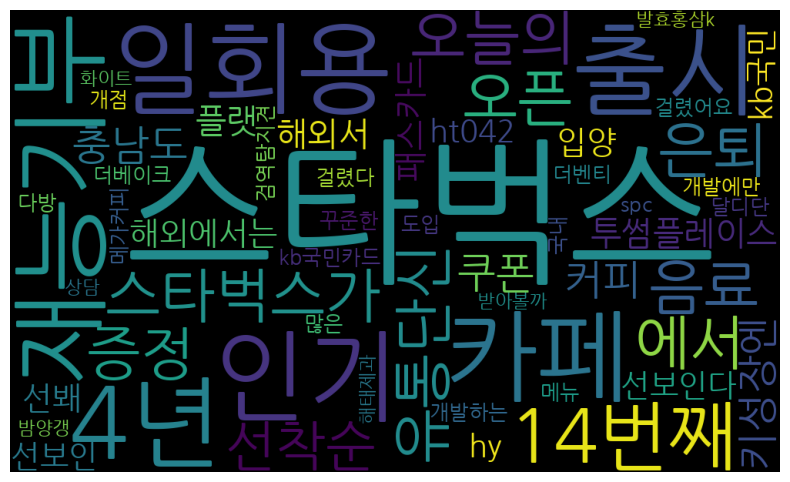

In [46]:
import requests
import pandas as pd

from bs4 import BeautifulSoup

print('페이지 정보 추출하기-----')
url = 'https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EC%8A%A4%ED%83%80%EB%B2%85%EC%8A%A4'
print(url)

response = requests.get(url)

t_list, d_list, link_list = [], [], []
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ul = soup.select_one('ul.list_news') #공백에 있을 경우 . 사용
    # 제목, 링크
    titles = ul.select('li > div > div > div.news_contents > a.news_tit')
    for title in titles:
        t_list.append(title.attrs['title'])
        link_list.append(title.attrs['href'])
#         print(title.get_text())
    # 상세 설명
    titles = ul.select('li > div > div > div.news_contents > div.news_dsc > div.dsc_wrap > a')
    for title in titles:
        d_list.append(title.get_text())
else :
    print(response.status_code)
print('페이지 정보 추출완료-----')
t_list, d_list, link_list

data = {'title': t_list, 'desc':d_list,'link':link_list}
df = pd.DataFrame(data)

df.to_csv('스타벅스_naver_news.csv', index=False) # 파일로 저장하기

corpus = df['title'].to_list()
corpus
feature_name, count = get_wordTokenCount(corpus)
print(list(zip(feature_name, count))[:50])
make_wordcloud(feature_name, count)


----------

페이지 정보 추출하기-----
https://entertain.naver.com/ranking
None


AttributeError: 'NoneType' object has no attribute 'select'